# Exploratory Data Analysis

## Data Exploration

### Import Necessary

In [17]:
import os
import requests
import zipfile
import shutil
import matplotlib.pyplot as plt
import random
from matplotlib.image import imread
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image


### Download dataset

In [18]:
# Kaggle dataset URL
dataset_url = "https://www.kaggle.com/api/v1/datasets/download/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign"

# Target folder
dataset_folder = "../Dataset"
os.makedirs(dataset_folder, exist_ok=True)

# Filepath for the downloaded zip file
zip_filepath = os.path.join(dataset_folder, "gtsrb-german-traffic-sign.zip")

# Check if the dataset already exists
target_folder = os.path.join(dataset_folder, "GTSRB")
if os.path.exists(target_folder):
    print(f"The dataset is already available in '{target_folder}'. Skipping download and extraction.")
else:
    # Download the dataset if the zip file doesn't already exist
    if not os.path.exists(zip_filepath):
        print(f"Downloading dataset from {dataset_url}...")
        with requests.get(dataset_url, stream=True) as response:
            response.raise_for_status()
            with open(zip_filepath, "wb") as file:
                for chunk in response.iter_content(chunk_size=8192):
                    file.write(chunk)
        print(f"Dataset downloaded and saved to {zip_filepath}")
    else:
        print(f"The dataset zip file already exists at '{zip_filepath}'. Skipping download.")

    print("Unzipping the dataset...")
    # Extract the downloaded zip file
    with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
        zip_ref.extractall(dataset_folder)

    # Rename the extracted folder to GTSRB
    extracted_folder = os.path.join(dataset_folder, "gtsrb-german-traffic-sign")
    if os.path.exists(extracted_folder):
        shutil.move(extracted_folder, target_folder)
        print(f"Renamed folder to '{target_folder}'.")
    else:
        print("Extracted folder not found. Please check the zip file contents.")

print(f"Dataset is ready in the '{target_folder}' folder.")


The dataset is already available in '../Dataset/GTSRB'. Skipping download and extraction.
Dataset is ready in the '../Dataset/GTSRB' folder.


### Import Dataset

In [19]:

train_path = '../Dataset/GTSRB/Train'
test_path = '../Dataset/GTSRB/Test'

resized_train_image = './resized_train_image'
resized_test_image = './resized_test_image'

os.makedirs(resized_train_image, exist_ok=True)
os.makedirs(resized_test_image, exist_ok=True)

### Total Classes for this dataset

In [20]:
# Count class
num_of_classes = len(os.listdir(train_path))
num_of_classes

43

### Total images in dataset for train and test

### Define the count image function

In [21]:

def count_images(folder_path):
    """
    Count the total number of .png images in the dataset folder.
    Assumes the dataset is organized into subfolders for each class.
    """
    total_images = 0
    for root, dirs, files in os.walk(folder_path):
        png_files = [f for f in files if f.endswith(".png")]
        total_images += len(png_files)
    return total_images


In [22]:
# Count images
total_training_images = count_images(train_path)
total_testing_images = count_images(test_path)

print(f"Total Training Images: {total_training_images}")
print(f"Total Testing Images: {total_testing_images}")
print(f"Total Images in Dataset: {total_training_images + total_testing_images}")


Total Training Images: 39209
Total Testing Images: 12630
Total Images in Dataset: 51839


### Creating Dictionary

In [23]:
# Define label for each class
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### Visualize number of images in each class

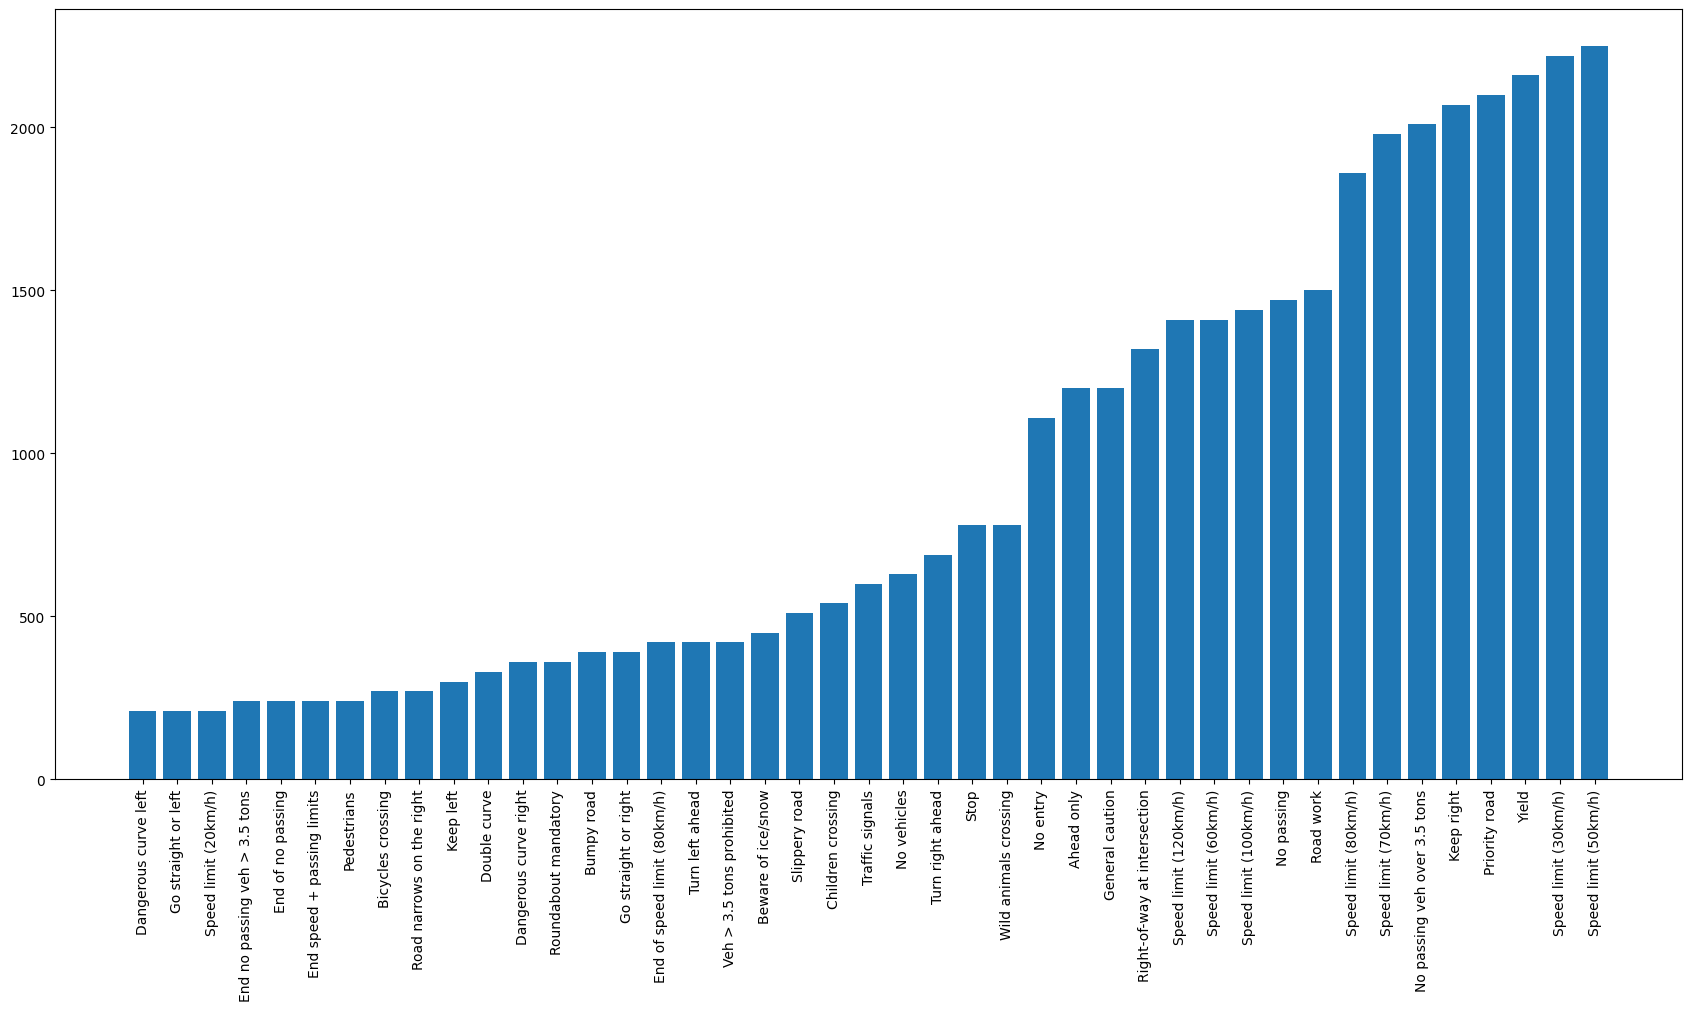

In [24]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

### Display one image from each class

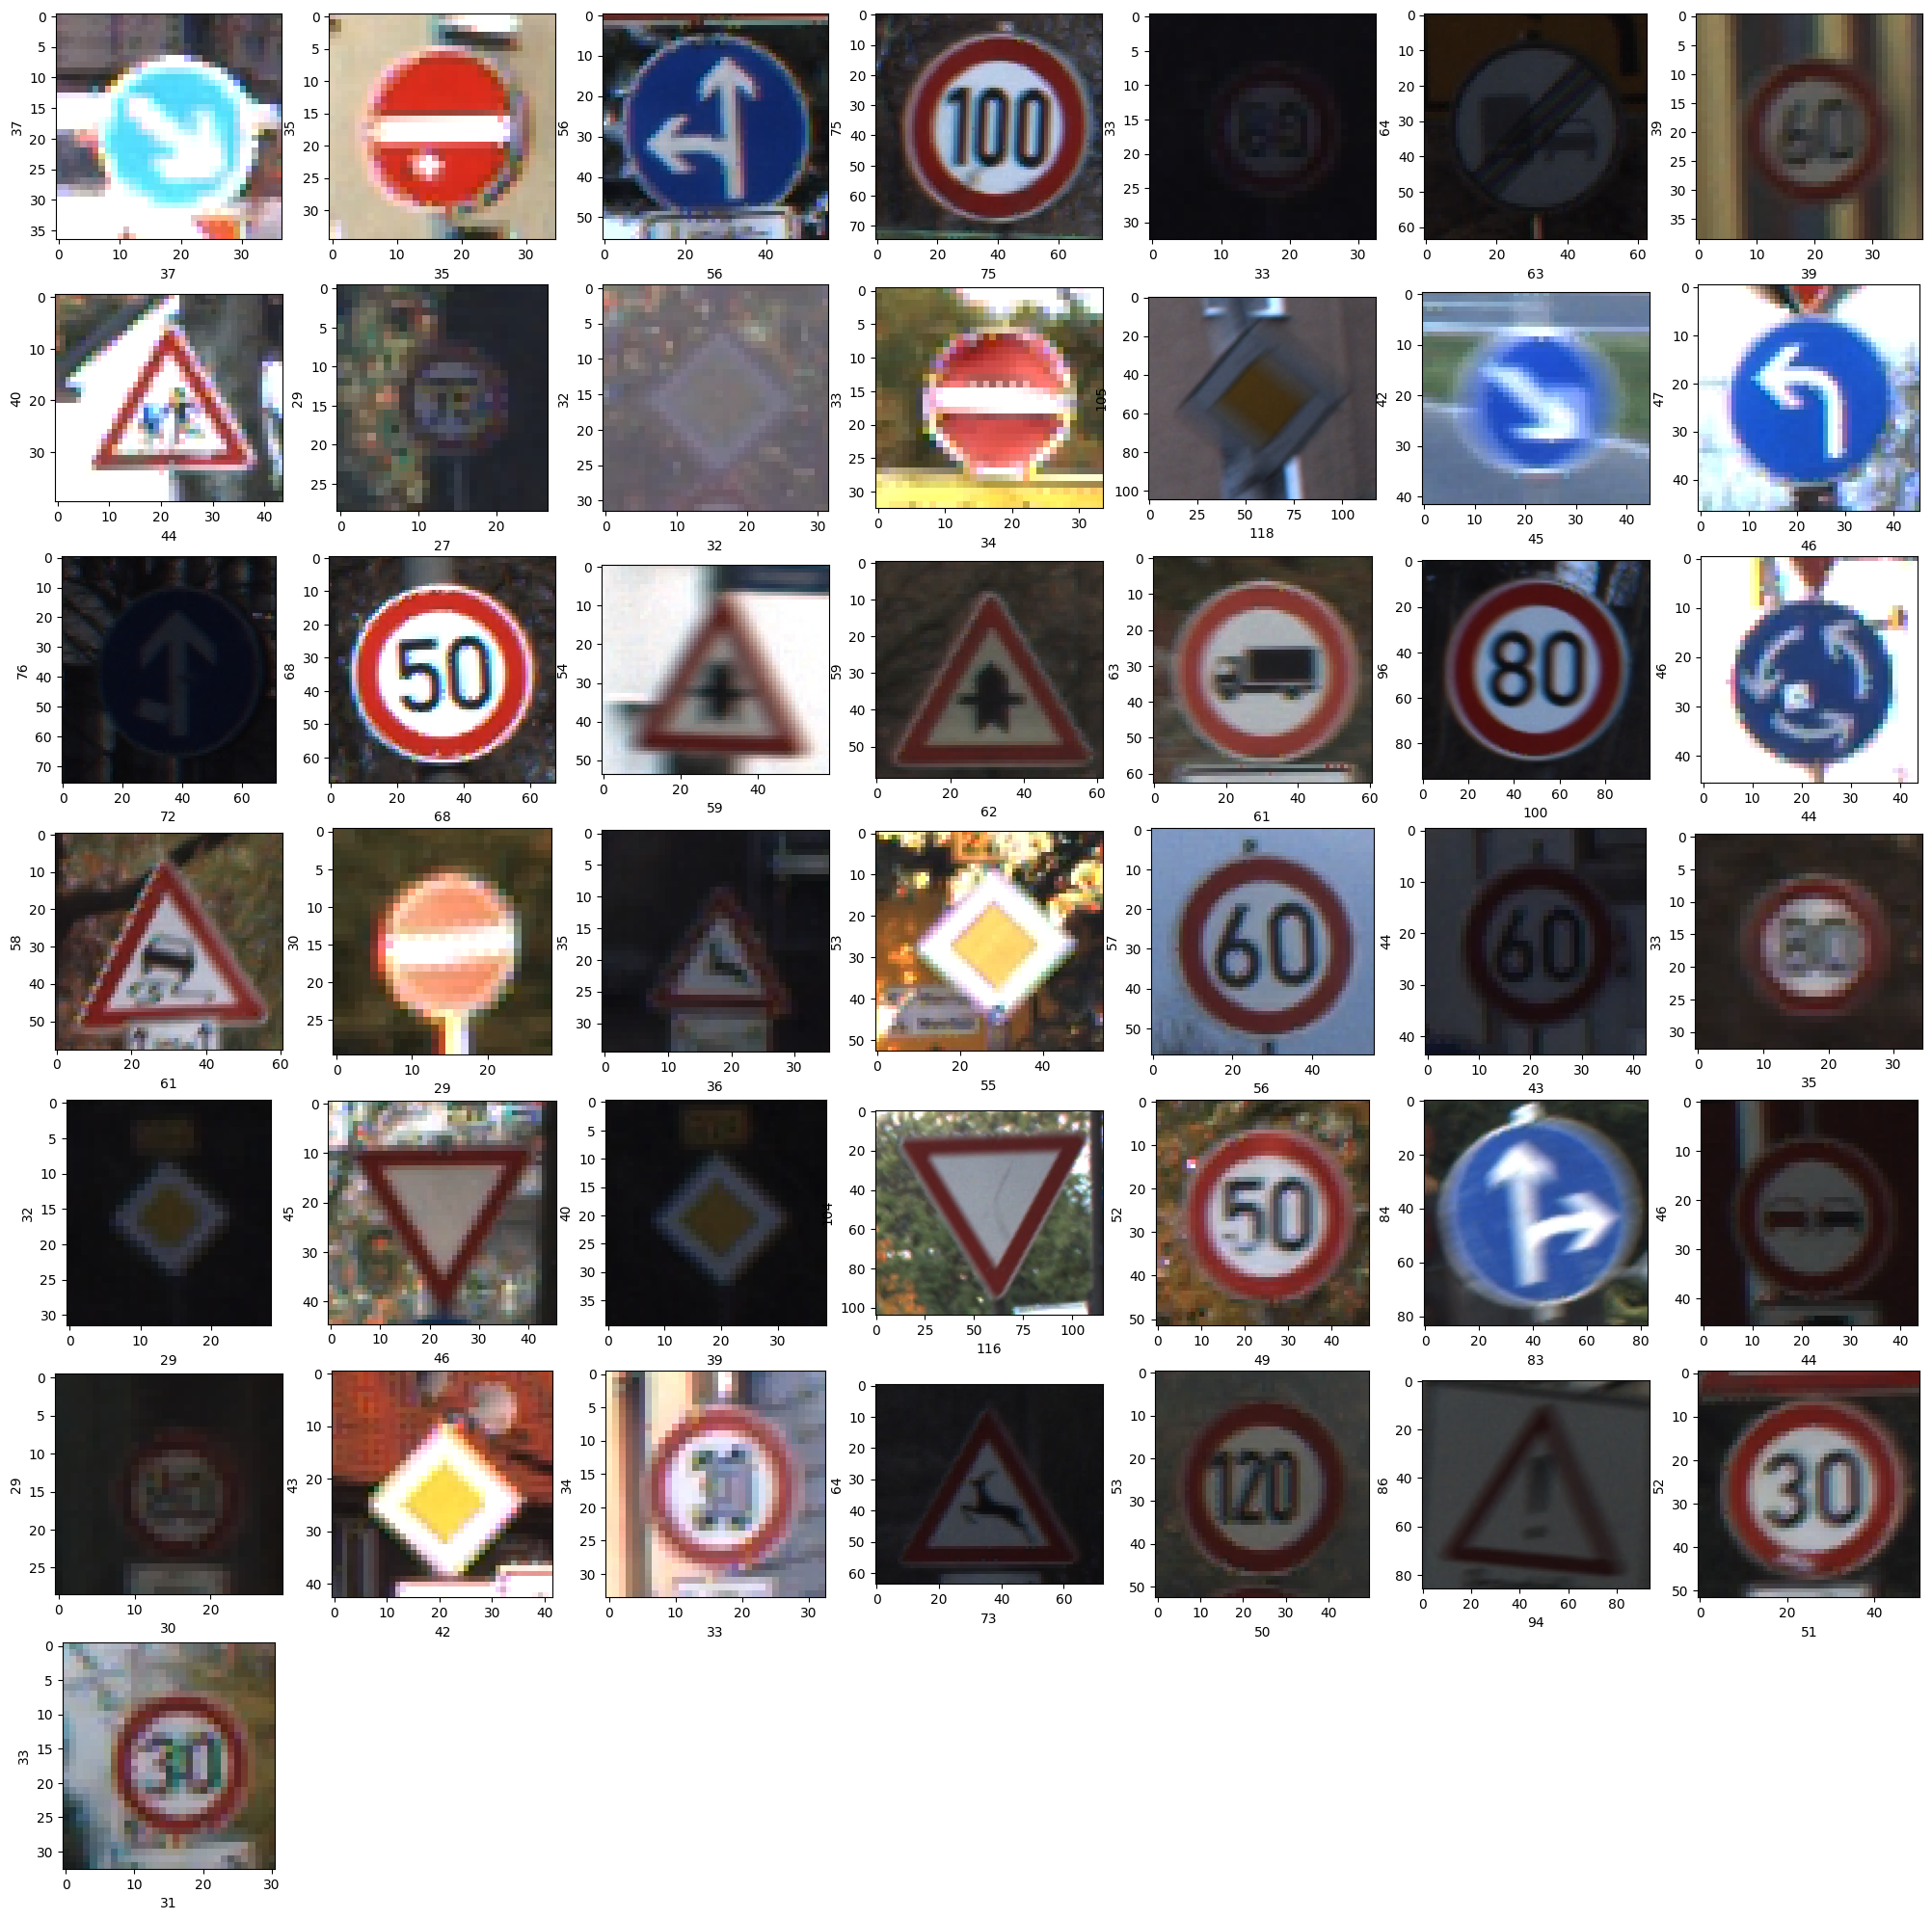

In [25]:


test = pd.read_csv('../Dataset/GTSRB/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,44):
    plt.subplot(7,7,i)
    random_img_path = '../Dataset/GTSRB/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    # plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

### Class distribution

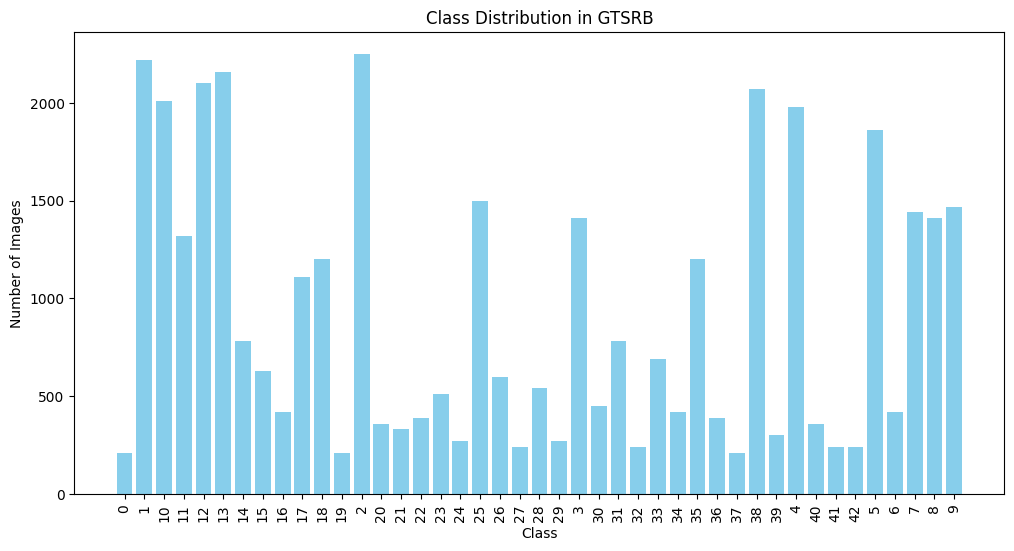

In [26]:
# Path to your Train folder
classes = sorted(os.listdir(train_path))

# Count images in each class
class_counts = []
for cls in classes:
    class_folder = os.path.join(train_path, cls)
    if os.path.isdir(class_folder):  # Ensure it's a folder, not a file
        class_counts.append(len(os.listdir(class_folder)))

# Plot the class distribution
plt.figure(figsize=(12, 6))
plt.bar(range(len(classes)), class_counts, color="skyblue")
plt.xticks(range(len(classes)), classes, rotation=90)
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in GTSRB")
plt.show()


## Data Preprocessing for Traffic Sign Detection

### 1. Data Cleansing

#### Training Data

#### a. Standard Image Size

In [27]:
# Specify input and output directories
image_size = (30,30)  # New image size (width, height)

# Ensure the output folder exists
os.makedirs(resized_train_image, exist_ok=True)

# Iterate through each class folder
for class_folder in os.listdir(train_path):
    class_path = os.path.join(train_path, class_folder)
    
    # Skip non-folder files
    if not os.path.isdir(class_path):
        continue
    
    # Create the corresponding class folder in the output directory
    output_class_path = os.path.join(resized_train_image, class_folder)
    os.makedirs(output_class_path, exist_ok=True)
    
    # Iterate through each image in the class folder
    for filename in os.listdir(class_path):
        filepath = os.path.join(class_path, filename)
        
        # Read and resize the image
        img = cv2.imread(filepath)
        if img is not None:  # Ensure the image is loaded correctly
            resized_img = cv2.resize(img, image_size)
            
            # Save the resized image to the output folder
            cv2.imwrite(os.path.join(output_class_path, filename), resized_img)

print("Images resized and saved successfully!")

Images resized and saved successfully!


#### Testing Data

#### a. Standard Image Size

In [28]:
# Specify input and output directories
test = pd.read_csv('../Dataset/GTSRB/Test.csv')

labels = test["ClassId"].values
images = test["Path"].values

data = []

for img in images:
    try:
        # Read the image
        image = cv2.imread('../Dataset/GTSRB/' + img)
        
        # Ensure the image is read correctly
        if image is None:
            print(f"Error reading image: {img}")
            continue
        
        # Convert to PIL Image and resize
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((30,30))
        data.append(np.array(resize_image))
        
        output_path = os.path.join(resized_test_image, os.path.basename(img))
        resize_image.save(output_path)  # Save using PIL Image
    except Exception as e:
        print(f"Error processing image {img}: {e}")

print("Images resized and saved successfully!")


Images resized and saved successfully!
